In [1]:
# libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import xml.etree.ElementTree as ET

from utils import *
#from scipy.interpolate import splprep, splev

import ipywidgets as widgets
from IPython.display import display, clear_output


In [2]:
# path to data
datasets_path = "CrowdsourcingDataset-Amgadetal2019/"

bcss_images = os.listdir(datasets_path + "/images/")
bcss_masks = os.listdir(datasets_path + "/masks/")
masks_df = pd.read_table(datasets_path + "/meta/gtruth_codes.tsv")

# XML
xml_path = "xml_yolov8s_super_iou=0.2_conf=0.1_agnosticNMS_full_size/"#"xml_files/"

file_names = [filename.split('.xml')[0] for filename in os.listdir(xml_path) if filename.endswith('.xml')]

# Create a Dropdown or Select widget
dropdown_menu = widgets.Select(
    options=file_names,
    description='Choose slide:',
    disabled=False,
    rows = 10
)


# Display the widget
display(dropdown_menu) 

Select(description='Choose slide:', options=('TCGA-A1-A0SK-DX1_xmin45749_ymin25055_MPP-0.2000', 'TCGA-A1-A0SP-…

In [3]:
bboxes_df = load_xml_to_dataframe(xml_path, dropdown_menu.value)

# plot image 
image_path = datasets_path + "/images/" + dropdown_menu.value + ".png"
mask_path = datasets_path + "/masks/" + dropdown_menu.value + ".png"


# Button creation
button1 = widgets.Button(description="Slide")
button2 = widgets.Button(description="Mask")
button3 = widgets.Button(description="Masked Slide")
button4 = widgets.Button(description="Bounding Boxes")
button5 = widgets.Button(description="Cell Graph")
button6 = widgets.Button(description="Segmented Graph")

# Create an output widget to display plot
plot_output = widgets.Output()


# Event handlers for each button
def on_button1_clicked(b):
    #clear_output(wait=True)
    img = mpimg.imread(image_path)
    display_image(img,plot_output) # Replace with actual image path

def on_button2_clicked(b):
    #clear_output(wait=True)
    img = mpimg.imread(mask_path)
    display_image(img,plot_output) # Replace with actual image path

def on_button3_clicked(b):
    img = apply_colored_mask_on_image(image_path, mask_path, masks_df)
    display_image(img,plot_output) # Replace with actual image path

def on_button4_clicked(b):
    img = draw_bboxes_on_image(image_path, bboxes_df)
    display_image(img,plot_output) # Replace with actual image path

def on_button5_clicked(b):
    img = draw_graph_on_image(image_path, mask_path, bboxes_df, node_color='cell_color', node_size=10, line_thickness=2)
    display_image(img,plot_output) # Replace with actual image path


def on_button6_clicked(b):
    img = draw_graph_on_image(image_path, mask_path, bboxes_df, node_color='mask_color', node_size=10, line_thickness=2)
    display_image(img,plot_output) # Replace with actual image path


# Linking buttons to their event handlers
button1.on_click(on_button1_clicked)
button2.on_click(on_button2_clicked)
button3.on_click(on_button3_clicked)
button4.on_click(on_button4_clicked)
button5.on_click(on_button5_clicked)
button6.on_click(on_button6_clicked)

# Display buttons and output widget
button_box = widgets.HBox([button1, button2, button3, button4, button5, button6])
display(button_box, plot_output)

Output()

# OLD STUFF

In [8]:
dropdown_menu.value

'TCGA-E2-A150-DX1_xmin42083_ymin62113_MPP-0.2000'

In [9]:
# load graph nodes and edges from file 
nodes_file = "output/bcss_delaunay_graph_yolov8s_super_iou=0.2_conf=01_NMS/" + dropdown_menu.value + "_nodes.csv"
edges_file = "output/bcss_delaunay_graph_yolov8s_super_iou=0.2_conf=01_NMS/" + dropdown_menu.value + "_edges.csv"

nodes_df = pd.read_csv(nodes_file)
edges_df = pd.read_csv(edges_file)


G = nx.Graph()

for index, row in nodes_df.iterrows():
    G.add_node(row['id'], x=row['x'], y=row['y'], label=row['class'], )

for index, row in edges_df.iterrows():
    G.add_edge(row['source'], row['target'])


In [10]:
len(G.nodes), len(G.edges)

(10423, 31246)

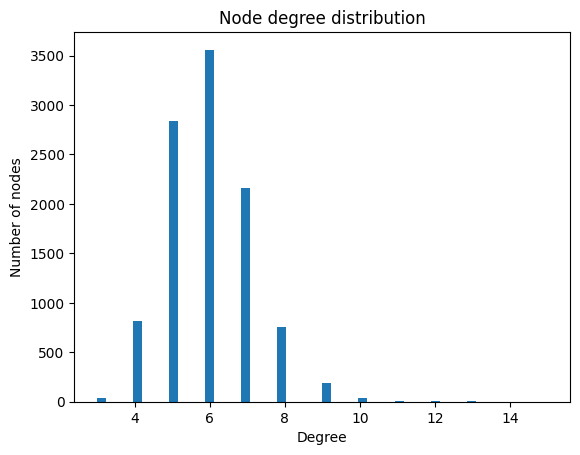

In [11]:
# plot statistics node degree
degrees = [val for (node, val) in G.degree()]
plt.hist(degrees, bins=50)
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Node degree distribution')
plt.show()

In [ ]:
np.zeros((len(G.nodes), len(G.nodes))).shape

In [ ]:
8146%2000

In [ ]:
for node in G.nodes():
    print(G.nodes[node])
    break

In [ ]:
# draw graph
image_path = datasets_path + "/images/" + dropdown_menu.value + ".png"
img = mpimg.imread(image_path)


image = plt.imread(image_path)
image = image[:, :, 0:3]

dpi = 100
height, width, depth = image.shape
figsize = width / float(dpi), height / float(dpi)
    # Create a figure and axis object
fig, ax = plt.subplots( figsize=figsize)
ax.imshow(image)

# graph
x,y = nx.get_node_attributes(G, 'x'), nx.get_node_attributes(G, 'y')
pos = {node:(x[node], y[node]) for node in G.nodes()}

label = nx.get_node_attributes(G, 'label')
#nx.draw(G, pos, with_labels=False, node_size=20, width = 1, node_color=[normalize_tuple(class_colors[G.nodes[node]['mask_value']]) for node in G.nodes], ax=ax)
nx.draw(G, pos, with_labels=False, node_size=30, width = 1, ax=ax)

plt.show()

In [ ]:
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
mask = cv2.imread(mask_path, 0)

# Convert the image to RGBA
img_rgba = cv2.cvtColor(img, cv2.COLOR_RGB2RGBA)

# Apply the mask to the alpha channel
alpha_channel = img_rgba[:, :, 3]
unique_values = np.unique(mask)

# Apply each colored mask
for value, rgba in colors.items():
    img = apply_colored_mask(img, mask, value, rgba, masks_df)
# plot mask
fig = plt.figure(figsize=(10, 10))

# Display the result
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
image = draw_bboxes_on_masked_image(img, bboxes_df)

plt.figure(figsize=(20,20))
plt.imshow(image)
plt.show()

In [ ]:
len(os.listdir(datasets_path + "/images/"))

In [ ]:
bboxes_df

In [ ]:
node_labels = [row['class'] for index, row in bboxes_df.iterrows()]

In [ ]:
from scipy.spatial import Delaunay
import networkx as nx
import matplotlib.pyplot as plt

node_colors = {0: 'black', 1 : 'blue', 2: 'yellow', 3: 'green', 4: 'red'}

node_mask_colors = {
    0: (0, 0, 0),             # Black for 'outside_roi'
    1: (255, 0, 0),           # Red for 'tumor'
    2: (0, 255, 0),           # Green for 'stroma'
    3: (0, 0, 255),           # Blue for 'lymphocytic_infiltrate'
    4: (255, 255, 0),         # Yellow for 'necrosis_or_debris'
    5: (255, 0, 255),         # Magenta for 'glandular_secretions'
    6: (0, 255, 255),         # Cyan for 'blood'
    7: (192, 192, 192),       # Gray for 'exclude'
    8: (128, 0, 0),           # Maroon for 'metaplasia_NOS'
    9: (128, 128, 0),         # Olive for 'fat'
    10: (0, 128, 0),          # Dark Green for 'plasma_cells'
    11: (128, 0, 128),        # Purple for 'other_immune_infiltrate'
    12: (0, 128, 128),        # Teal for 'mucoid_material'
    13: (0, 0, 128),          # Navy for 'normal_acinus_or_duct'
    14: (255, 165, 0),        # Orange for 'lymphatics'
    15: (255, 20, 147),       # Deep Pink for 'undetermined'
    16: (75, 0, 130),         # Indigo for 'nerve'
    17: (173, 216, 230),      # Light Blue for 'skin_adnexa'
    18: (240, 128, 128),      # Light Coral for 'blood_vessel'
    19: (210, 105, 30),       # Chocolate for 'angioinvasion'
    20: (60, 179, 113),       # Medium Sea Green for 'dcis'
    21: (255, 228, 225)       # Misty Rose for 'other'
}

def normalize_tuple(tuple):
    return (tuple[0]/255,tuple[1]/255,tuple[2]/255)



def generate_graph_from_bboxes(bboxes_df, mask):
    # Assuming bboxes_df has columns ['xmin', 'ymin', 'xmax', 'ymax']
    # Calculate the center of each bounding box
    centers = np.vstack([(bboxes_df['xmin'].astype(int) + bboxes_df['xmax'].astype(int)) / 2, 
                         (bboxes_df['ymin'].astype(int) + bboxes_df['ymax'].astype(int)) / 2]).T

    # Perform Delaunay Triangulation
    tri = Delaunay(centers)

    # Create a graph from the triangulation
    graph = nx.Graph()
    

    for i, point in enumerate(centers):
        mask_value = mask[int(point[1]), int(point[0])]
        graph.add_node(i, pos=tuple(int(point[0]), int(point[1])), label=bboxes_df['class'].iloc[i], 
                       cell_color=node_colors[bboxes_df['class'].iloc[i]], 
                       mask_value=int(mask_value), mask_color=normalize_tuple(node_mask_colors[int(mask_value)]))

    # Add edges from the Delaunay triangulation
    for simplex in tri.simplices:
        for i in range(len(simplex)):
            for j in range(i+1, len(simplex)):
                graph.add_edge(simplex[i], simplex[j])

    
    return graph

In [ ]:
G = generate_graph_from_bboxes(bboxes_df, mask)

In [ ]:
tmp = []

for node in G.nodes():
    tmp.append(G.nodes[node]['mask_value'])

# tmp unique values
np.unique(tmp)

In [ ]:
node_mask_colors = {
    0: (0, 0, 0),             # Black for 'outside_roi'
    1: (255, 0, 0),           # Red for 'tumor'
    2: (0, 255, 0),           # Green for 'stroma'
    3: (0, 0, 255),           # Blue for 'lymphocytic_infiltrate'
    4: (255, 255, 0),         # Yellow for 'necrosis_or_debris'
    5: (255, 0, 255),         # Magenta for 'glandular_secretions'
    6: (0, 255, 255),         # Cyan for 'blood'
    7: (192, 192, 192),       # Gray for 'exclude'
    8: (128, 0, 0),           # Maroon for 'metaplasia_NOS'
    9: (128, 128, 0),         # Olive for 'fat'
    10: (0, 128, 0),          # Dark Green for 'plasma_cells'
    11: (128, 0, 128),        # Purple for 'other_immune_infiltrate'
    12: (0, 128, 128),        # Teal for 'mucoid_material'
    13: (0, 0, 128),          # Navy for 'normal_acinus_or_duct'
    14: (255, 165, 0),        # Orange for 'lymphatics'
    15: (255, 20, 147),       # Deep Pink for 'undetermined'
    16: (75, 0, 130),         # Indigo for 'nerve'
    17: (173, 216, 230),      # Light Blue for 'skin_adnexa'
    18: (240, 128, 128),      # Light Coral for 'blood_vessel'
    19: (210, 105, 30),       # Chocolate for 'angioinvasion'
    20: (60, 179, 113),       # Medium Sea Green for 'dcis'
    21: (255, 228, 225)       # Misty Rose for 'other'
}

def normalize_tuple(tuple):
    return (tuple[0]/255,tuple[1]/255,tuple[2]/255)


# Load the image
image = cv2.imread(image_path)

image = plt.imread(image_path)
image = image[:, :, 0:3]

dpi = 100
height, width, depth = image.shape
figsize = width / float(dpi), height / float(dpi)
    # Create a figure and axis object
fig, ax = plt.subplots( figsize=figsize)
ax.imshow(image)

# graph
pos = nx.get_node_attributes(G, 'pos')
#nx.draw(G, pos, with_labels=False, node_size=30, width = 1, node_color=[normalize_tuple(class_colors[G.nodes[node]['mask_value']]) for node in G.nodes], ax=ax)
nx.draw(G, pos, with_labels=False, node_size=20, width = 1, node_color=list(nx.get_node_attributes(G, 'color').values()), ax=ax)

plt.show()

In [ ]:
for edge in G.edges():
    print(G.nodes[edge[0]]['pos'])
    break

In [ ]:
def draw_graph_on_image(image, graph, node_size=30, line_thickness=8):
    # Loop through the edges in the graph to draw lines
    for edge in graph.edges():
        pt1 = (graph.nodes[edge[0]]['pos'][0].astype(int), graph.nodes[edge[0]]['pos'][1].astype(int))
        pt2 = (graph.nodes[edge[1]]['pos'][0].astype(int), graph.nodes[edge[1]]['pos'][1].astype(int)) 
        cv2.line(image, pt1, pt2, (0, 0, 0), thickness=line_thickness)  # Blue color for lines

    # Loop through the nodes in the graph to draw circles
    for node in graph.nodes():
        cv2.circle(image, (int(graph.nodes[node]['pos'][0]),int(graph.nodes[node]['pos'][1])), node_size, graph.nodes[node]['mask_color'], -1)  # Green color for nodes

    return image

image = draw_graph_on_image(image, G, node_size=5, line_thickness=1)

plt.figure(figsize=(20,20))
plt.imshow(image)
plt.show()


In [ ]:

# Load the image
image = cv2.imread(image_path)

image = plt.imread(image_path)
image = image[:, :, 0:3]

dpi = 100
height, width, depth = image.shape
figsize = width / float(dpi), height / float(dpi)
    # Create a figure and axis object
fig, ax = plt.subplots( figsize=figsize)
ax.imshow(image)

# graph
pos = nx.get_node_attributes(G, 'pos')
#nx.draw(G, pos, with_labels=False, node_size=20, width = 1, node_color=[normalize_tuple(class_colors[G.nodes[node]['mask_value']]) for node in G.nodes], ax=ax)
nx.draw(G, pos, with_labels=False, node_size=30, width = 1, node_color=list(nx.get_node_attributes(G, 'color').values()), ax=ax)

plt.show()